In [2]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


/tmp/ipykernel_581851/2478483146.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Residuo_Grezzo'], color="red", shade=True, label="Distribuzione Errore Grezzo (Bias)")
/tmp/ipykernel_581851/2478483146.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Residuo_Calibrato'], color="blue", shade=True, label="Distribuzione Errore Calibrato (White Noise)")


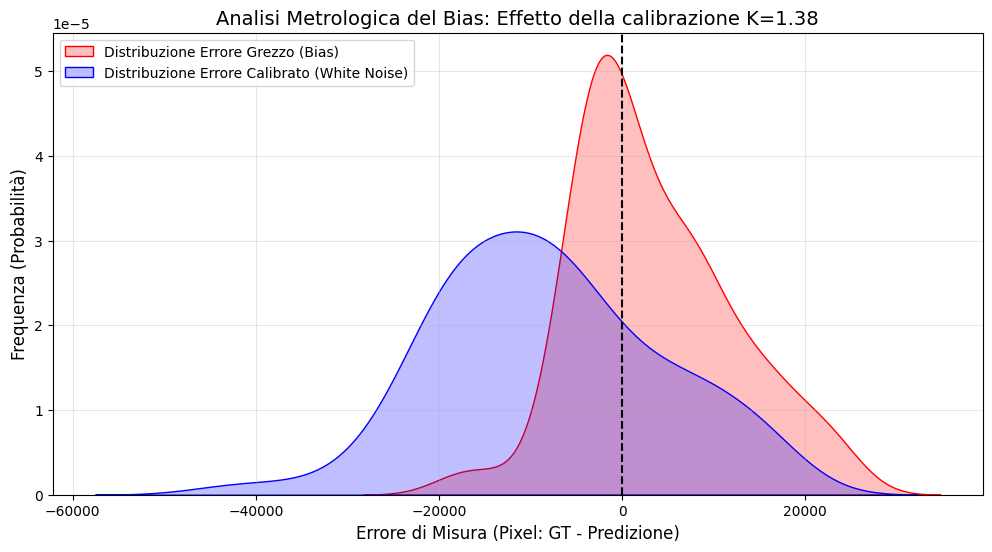

Errore Medio Residuo Grezzo: 3415.15 px
Errore Medio Residuo Calibrato: -8117.33 px


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Carica i tuoi dati
df = pd.read_csv('/home/ricc/Documents/PatchesTests/confronto_finale2.csv')

# 2. Calcola i residui
df['Residuo_Grezzo'] = df['Area_GT'] - df['Area_AI_Raw']
df['Residuo_Calibrato'] = df['Area_GT'] - df['Area_AI_Corr']

# 3. Grafico della Densità dei Residui
plt.figure(figsize=(12, 6))

sns.kdeplot(df['Residuo_Grezzo'], color="red", shade=True, label="Distribuzione Errore Grezzo (Bias)")
sns.kdeplot(df['Residuo_Calibrato'], color="blue", shade=True, label="Distribuzione Errore Calibrato (White Noise)")

plt.axvline(0, color='black', linestyle='--') # Il Punto di Perfezione Metrologica

plt.title('Analisi Metrologica del Bias: Effetto della calibrazione K=1.38', fontsize=14)
plt.xlabel('Errore di Misura (Pixel: GT - Predizione)', fontsize=12)
plt.ylabel('Frequenza (Probabilità)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Errore Medio Residuo Grezzo: {df['Residuo_Grezzo'].mean():.2f} px")
print(f"Errore Medio Residuo Calibrato: {df['Residuo_Calibrato'].mean():.2f} px")